In [27]:
pairs = ["ZRX-USD","1INCH-USD","AAVE-USD","ALCX-USD","ACH-USD","AGLD-USD","ALGO-USD","AMP-USD","FORTH-USD","ANKR-USD","API3-USD","ARPA-USD",
            "ASM-USD","REP-USD","AVAX-USD","AVT-USD","AXS-USD","BADGER-USD","BAL-USD","BNT-USD","BAND-USD","BOND-USD","BAT-USD","BICO-USD",
            "BTC-USD","BCH-USD","BLZ-USD","FIDA-USD","AUCTION-USD","BTRST-USD","ADA-USD","CTSI-USD","LINK-USD","CHZ-USD","CVC-USD",
            "CLV-USD","COMP-USD","ATOM-USD","COTI-USD","COVAL-USD","CTX-USD","CRO-USD","CRV-USD","DAI-USD","DASH-USD","MANA-USD",
            "DESO-USD","DDX-USD","YFII-USD","DIA-USD","DNT-USD","DOGE-USD","ENJ-USD","MLN-USD","EOS-USD","ETH-USD","ETC-USD","ENS-USD",
            "FET-USD","FIL-USD","FX-USD","GALA-USD","GTC-USD","GODS-USD","GFI-USD","GYEN-USD","FARM-USD","ZEN-USD","IDEX-USD",
            "RLC-USD","IMX-USD","ICP-USD","INV-USD","IOTX-USD","JASMY-USD","KEEP-USD","KRL-USD","KNC-USD","LCX-USD","LQTY-USD","LTC-USD",
            "LPT-USD","LOOM-USD","LRC-USD","MKR-USD","MPL-USD","MASK-USD","MDT-USD","MIR-USD","MCO2-USD","MUSD-USD","NKN-USD","NU-USD",
            "NMR-USD","OMG-USD","ORCA-USD","OXT-USD","OGN-USD","TRAC-USD","ORN-USD","UPI-USD","PERP-USD","PLA-USD",
            "PLU-USD","DOT-USD","POLS-USD","MATIC-USD","POLY-USD","NCT-USD","POWR-USD","PRO-USD","QNT-USD","QSP-USD","QUICK-USD","RAD-USD",
            "RAI-USD","RLY-USD","RGT-USD","RARI-USD","REN-USD","RNDR-USD","REQ-USD","RBN-USD","FOX-USD","SHIB-USD","SHPING-USD","SKL-USD",
            "SOL-USD","SPELL-USD","STX-USD","XLM-USD","STORJ-USD","SUKU-USD","SUPER-USD","SUSHI-USD","SNX-USD","TRB-USD",
            "UST-USD","USDT-USD","XTZ-USD","GRT-USD","TRIBE-USD","TRU-USD","UMA-USD","UNFI-USD","UNI-USD","VGX-USD","WBTC-USD",
            "wCFG-USD","WLUNA-USD","XYO-USD","YFI-USD","ZEC-USD"]

In [28]:
from datetime import datetime
import time
import json
import pandas as pd

def construct_download_url(
	ticker,
	period1,
	period2,
	interval='monthly'
):
	"""
	:period1 & period2: 'yyyy-mm-dd'
	:interval: {daily; weekly, monthly}
	"""
	def convert_to_seconds(period):
		datetime_value = datetime.strptime(period, '%Y-%m-%d')
		total_seconds = int(time.mktime(datetime_value.timetuple())) + 86400
		return total_seconds
	try:
		interval_reference = {'daily': '1d', 'weekly': '1wk', 'monthly': '1mo'}
		_interval = interval_reference.get(interval)
		if _interval is None:
			print('interval code is incorrect')
			return
		p1 = convert_to_seconds(period1)
		p2 = convert_to_seconds(period2)
		url = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={p1}&period2={p2}&interval={_interval}&filter=history'
		return url
	except Exception as e:
		print(e)
		return

In [38]:
# retrive dataset

list_df = []

for pair in pairs:
    query_url = construct_download_url(pair, '2017-01-01', '2023-01-30', 'daily')
    temp = pd.read_csv(query_url)
    temp['coin'] = f'{pair}'
    list_df.append(temp)

In [42]:
df = pd.concat(list_df, axis=0, ignore_index=True)

In [44]:
df['Date'] = pd.to_datetime(df['Date'])

# Pivot the dataframe to get the price data in a long format
df = df.pivot(index= 'Date', columns='coin', values='Close')

<AxesSubplot:>

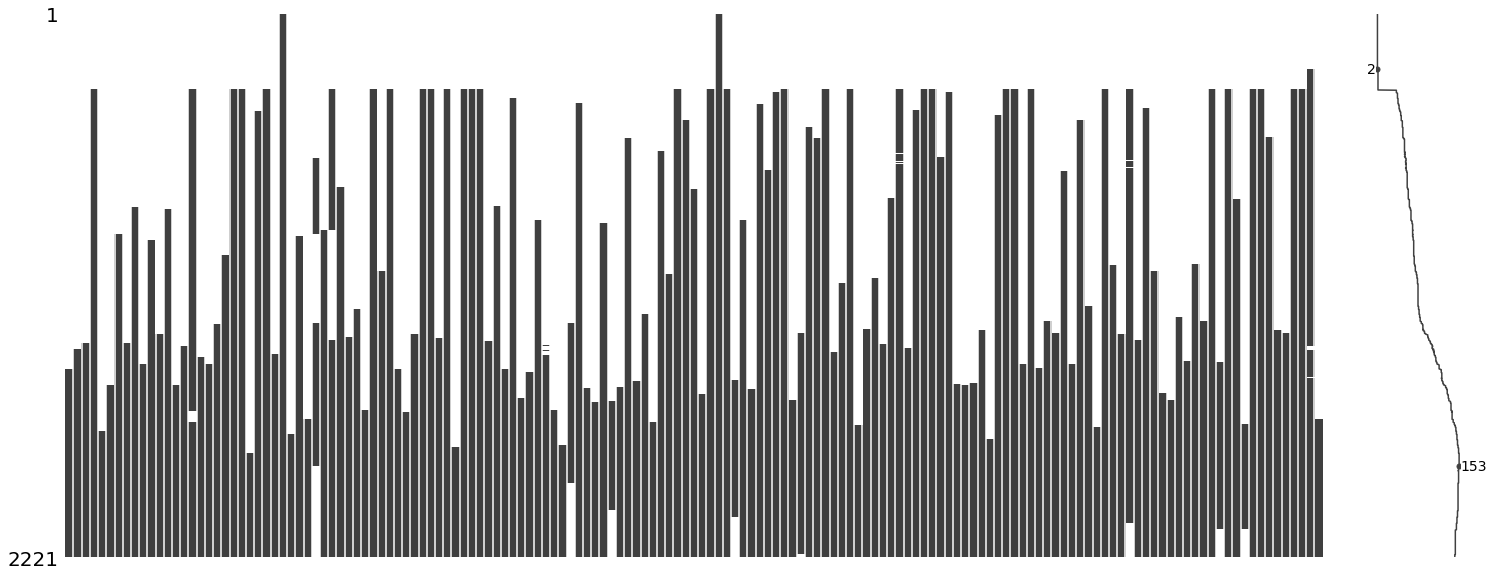

In [47]:
import missingno

missingno.matrix(df)

In [68]:
df_copy = df.copy()
df_copy

coin,1INCH-USD,AAVE-USD,ACH-USD,ADA-USD,AGLD-USD,ALCX-USD,ALGO-USD,AMP-USD,ANKR-USD,API3-USD,...,WLUNA-USD,XLM-USD,XTZ-USD,XYO-USD,YFI-USD,YFII-USD,ZEC-USD,ZEN-USD,ZRX-USD,wCFG-USD
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-26,0.527353,88.982803,0.010946,0.380059,0.313371,21.832306,0.245808,0.004801,0.027710,1.605310,...,NaN,0.091986,1.093432,0.006078,7547.181641,1270.460938,46.821453,10.365861,0.226541,0.258328
2023-01-27,0.534850,87.139816,0.011039,0.388979,0.321648,20.925913,0.254728,0.004820,0.027904,1.642303,...,NaN,0.092512,1.116810,0.006195,7649.660645,1275.270142,46.476784,10.630039,0.240023,0.264723
2023-01-28,0.528804,84.218231,0.011022,0.382351,0.308144,21.178452,0.257302,0.004781,0.027226,1.578928,...,NaN,0.092760,1.098451,0.006178,7431.888672,1349.466919,45.399754,10.289081,0.229763,0.272784


In [69]:
print('Data Shape before cleaning =', df_copy.shape)

missing_percentage = df_copy.isnull().mean().sort_values(ascending=False)
dropped_list = sorted(list(missing_percentage[missing_percentage > 0.30].index))
df_copy.drop(labels=dropped_list, axis=1, inplace=True)

print('Data Shape after cleaning =', df_copy.shape)

Data Shape before cleaning = (2221, 153)
Data Shape after cleaning = (2221, 55)


<AxesSubplot:>

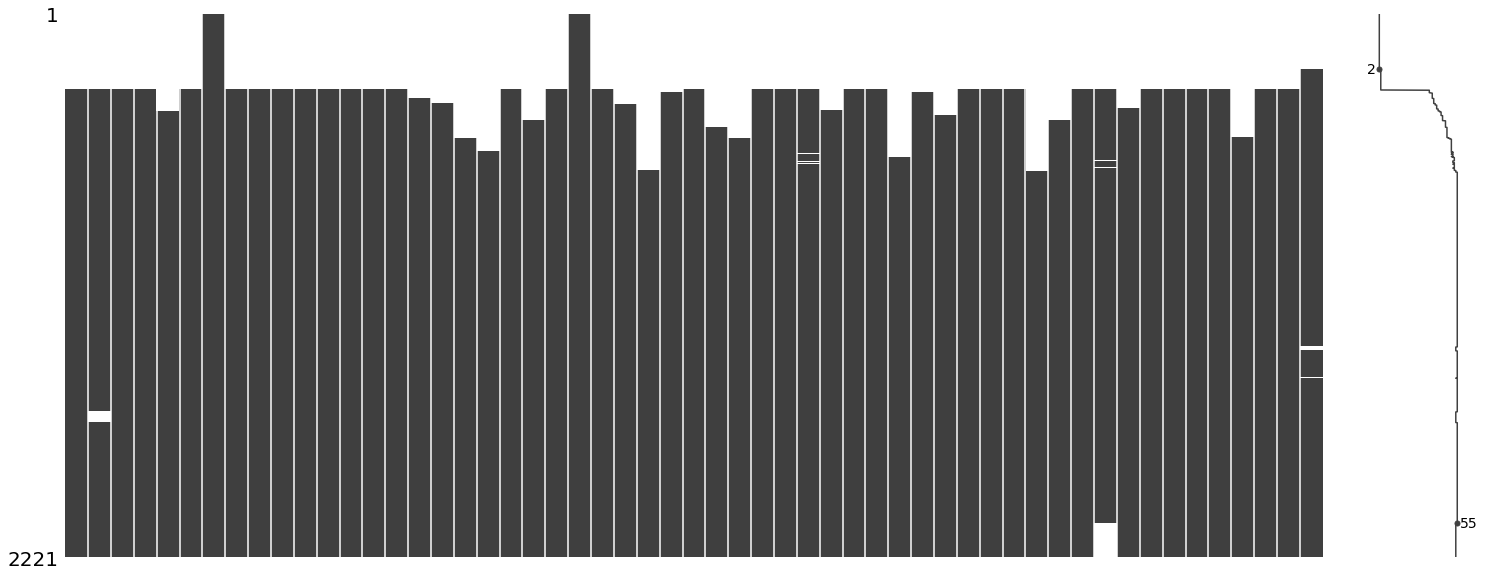

In [70]:
missingno.matrix(df_copy)

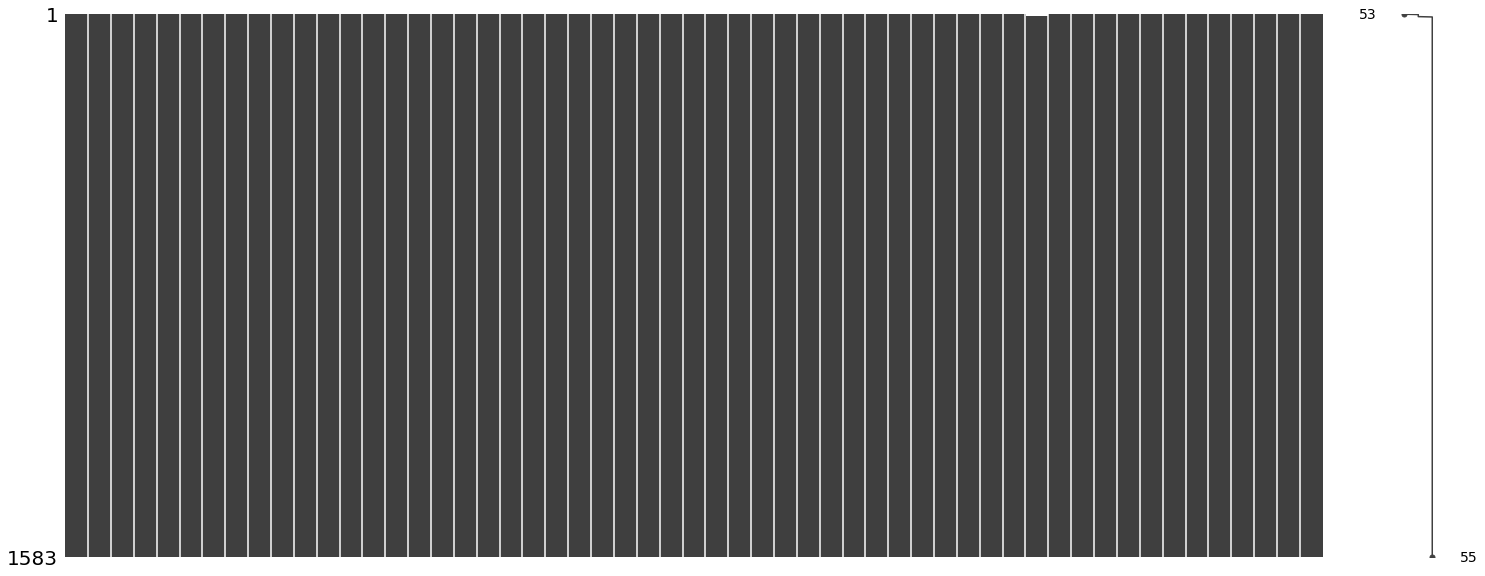

In [99]:
# I will also fill the missing values by the last available value in the column

df_copy = df_copy.fillna(method='ffill')

missingno.matrix(df_copy['2018-10-1':])
df_copy.drop(columns='SHPING-USD', axis=0, inplace=True)

data = df_copy['2018-10-1':]

In [100]:
data.to_excel('Data/crypto_dataset.xlsx')

In [101]:
data.isna().sum()

coin
ADA-USD      0
AVT-USD      0
BAT-USD      0
BCH-USD      0
BLZ-USD      0
BNT-USD      0
BTC-USD      0
CVC-USD      0
DASH-USD     0
DNT-USD      0
DOGE-USD     0
ENJ-USD      0
EOS-USD      0
ETC-USD      0
ETH-USD      0
FIL-USD      0
GTC-USD      0
IOTX-USD     0
KRL-USD      0
LINK-USD     0
LOOM-USD     0
LRC-USD      0
LTC-USD      0
MANA-USD     0
MDT-USD      0
MIR-USD      2
MKR-USD      0
MLN-USD      0
NCT-USD      0
NKN-USD      0
NMR-USD      0
OMG-USD      0
PLU-USD      0
POLY-USD     0
POWR-USD     0
PRO-USD      0
QNT-USD      0
QSP-USD      0
REN-USD      0
REP-USD      0
REQ-USD      0
RLC-USD      0
SNX-USD      0
STORJ-USD    0
SUPER-USD    0
TRAC-USD     0
USDT-USD     0
VGX-USD      0
XLM-USD      0
XTZ-USD      0
XYO-USD      0
ZEC-USD      0
ZEN-USD      0
ZRX-USD      0
dtype: int64